#Part A:

---



---



#KMEANS FUNCTION

---



In [ ]:
# TRY NUMBER TWO
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

# formula to find the euclidean distance between two points
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

# function to assign points to clusters
def assign_clusters(dataset, centers):
    clusters = []
    for x in dataset:
        distances = [euclidean_distance(x, c) for c in centers]
        cluster = np.argmin(distances)
        clusters.append(cluster)
    return np.array(clusters)

# function to update the centers of the clusters
def update_centers(dataset, clusters, k):
    centers = []
    for i in range(k):
        # mean of the datapoints assigned to each cluster
        center = dataset[clusters == i].mean(axis=0)
        centers.append(center)
    return np.array(centers)

# kmeans algorithm
def kmeans(dataset, centers, k,iter):
    num_of_iter = 0

    for i in range(iter):
        clusters = assign_clusters(dataset, centers)
        new_centers = update_centers(dataset, clusters, k)
        if np.array_equal(centers , new_centers):
            break
        centers = new_centers
        num_of_iter += 1
        
        plt.title(f'Clusters after {num_of_iter} iteration') if num_of_iter == 1 else plt.title(f'Clusters after {num_of_iter} iterations')
        plt.scatter(dataset[:,0],dataset[:,1],c=clusters,cmap='viridis')
        # plt.xlim(1,10)
        if(len(dataset) != 8):
          plt.xlabel("sbp")
          plt.ylabel("tobacco")
        plt.show()

    return clusters, centers, num_of_iter

#DATASET 1

---



---



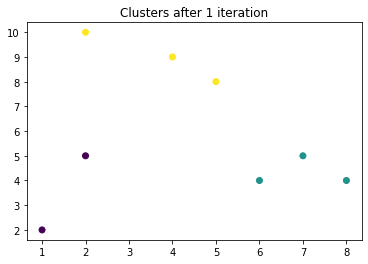

Final cluster assignments:
 [2 0 1 2 1 1 0 2]
Final centers:
 [[1.5        3.5       ]
 [7.         4.33333333]
 [3.66666667 9.        ]]
Number of iterations performed:  1


In [ ]:
dataset = np.array([[2,10],[2,5],[8,4],[5,8],[7,5],[6,4],[1,2],[4,9]])
cluster_centers =np.array([[2,5],[8,4],[4,9]])

clusters, centers, iter_num = kmeans(dataset, cluster_centers, k=3, iter=10)
print("Final cluster assignments:\n", clusters)
print("Final centers:\n", centers)
print("Number of iterations performed: ", iter_num)

#DATASET 2

---



---



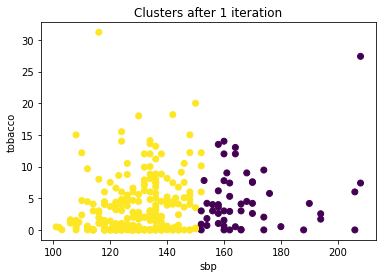

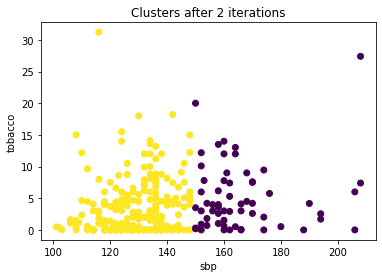

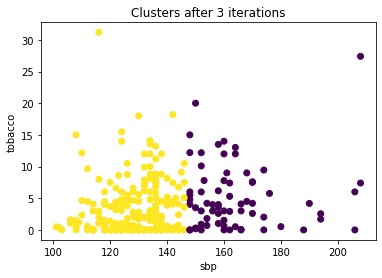

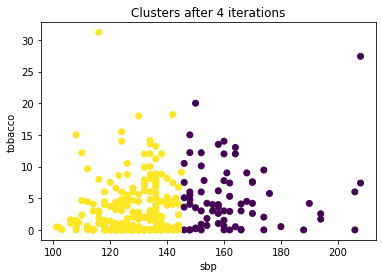

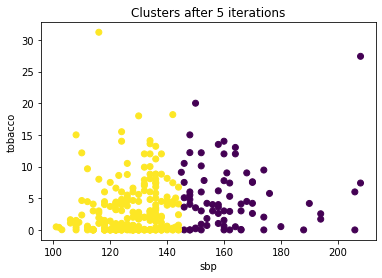

Final cluster assignments:
 [0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1
 0 1 0 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 1
 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 0 0 1 1
 1 1 1 0]
Final centers:
 [[162.41891892   5.27621622]
 [127.09292035   3.12769912]]
Number of iterations performed:  5


In [ ]:
# TRAINING THE ALGORITHM
x_cols = ['sbp','tobacco']
y_cols = ['chd']

x = pd.read_csv("https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv",usecols=x_cols)
y = pd.read_csv("https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv",usecols=y_cols)

trainingSet = x.head(300)
testingSet = x[300:462]
trainingSet = trainingSet.to_numpy()
testingSet = testingSet.to_numpy()
act_labels= y[300:462]
act_labels=act_labels.to_numpy()
cluster_centers = np.array([[166,3],[138,5]])

clusters, centers, iter_num = kmeans(trainingSet, cluster_centers, k=2, iter=10)
print("Final cluster assignments:\n", clusters)
print("Final centers:\n", centers)
print("Number of iterations performed: ", iter_num)

# Actual sbp vs tobacco scatter plot

---



---





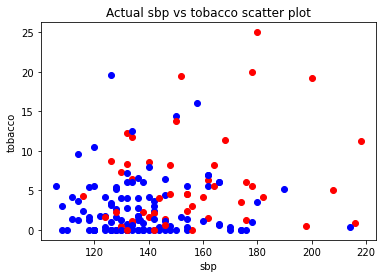

In [ ]:
# plt.scatter(x[:][0],x[:][1],cmap='viridis')
xScatter = x.to_numpy()
yScatter = y.to_numpy()
for i in range(300,462):
  if(yScatter[i] == 0):
    plt.scatter(xScatter[i,0],xScatter[i,1],c = 'blue')
  else:
    plt.scatter(xScatter[i,0],xScatter[i,1],c = 'red')

plt.xlabel("sbp")
plt.ylabel("tobacco")
plt.title("Actual sbp vs tobacco scatter plot")
plt.show()

#Accuracy

---



---



In [ ]:
# with the final centers being:  [[162.41891892   5.27621622][127.09292035   3.12769912]],
# we can use these values for our training set
KM_pred_labels = []

for i in range(testingSet.shape[0]):
  chd1 = euclidean_distance(testingSet[i],centers[0])
  chd0 = euclidean_distance(testingSet[i],centers[1])
  if(chd0 < chd1):
    KM_pred_labels.append(0)
  else:
    KM_pred_labels.append(1)
KM_pred_labels = np.array(KM_pred_labels)
KM_pred_labels = KM_pred_labels.reshape(162,1)
print(act_labels.shape)



# True Positive (TP): we predict a label of 1 (positive), and the true label is 1.
TP = np.sum(np.logical_and(KM_pred_labels == 1, act_labels == 1))
 
# True Negative (TN): we predict a label of 0 (negative), and the true label is 0.
TN = np.sum(np.logical_and(KM_pred_labels == 0, act_labels == 0))
 
# False Positive (FP): we predict a label of 1 (positive), but the true label is 0.
FP = np.sum(np.logical_and(KM_pred_labels == 1, act_labels == 0))
 
# False Negative (FN): we predict a label of 0 (negative), but the true label is 1.
FN = np.sum(np.logical_and(KM_pred_labels == 0, act_labels == 1))
 
print ('TP: %i, FP: %i, TN: %i, FN: %i' % (TP,FP,TN,FN))

accuracy = (TP + TN)/(TP+TN+FP+FN)
print(TP+TN)
print(TP+TN+FP+FN)
print(accuracy)

(162, 1)
TP: 29, FP: 31, TN: 81, FN: 21
110
162
0.6790123456790124


# Predicted sbp vs tobacco scatter plot

---



---



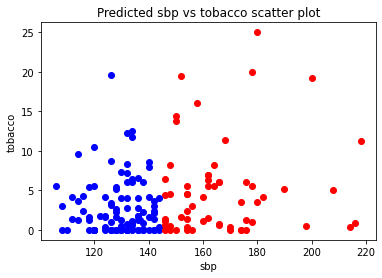

In [ ]:
xScatter = x.to_numpy()
yScatter = y.to_numpy()
for i in range(testingSet.shape[0]):
  if(KM_pred_labels[i] == 0):
    plt.scatter(testingSet[i,0],testingSet[i,1],c = 'blue')
  else:
    plt.scatter(testingSet[i,0],testingSet[i,1],c = 'red')
plt.xlabel("sbp")
plt.ylabel("tobacco")
plt.title("Predicted sbp vs tobacco scatter plot")
plt.show()

#PART B:

---

---



# Nearest Neighbor Function

---



---



In [ ]:
def nearest_neighbor(point, points, threshold):
    min_distance = threshold
    nearest_index = -1
    for i, p in enumerate(points):
        if not np.array_equal(p, point):
            distance = euclidean_distance(point, p)
            if distance < min_distance:
                nearest_index = i
    return nearest_index

def NN_clustering(points, threshold):
    points = np.array(points)
    n = len(points)
    clusters = [set([i]) for i in range(n)]
    for i, p in enumerate(points):
        nearest_index = nearest_neighbor(p, points, threshold)
        if nearest_index != -1:
            if euclidean_distance(p, points[nearest_index]) < threshold:
                cluster1 = next((cluster for cluster in clusters if i in cluster))
                cluster2 = next((cluster for cluster in clusters if nearest_index in cluster))
                if cluster1 != cluster2:
                    clusters.remove(cluster2)
                    cluster1 |= cluster2
            else:
                clusters.append(set([i]))

    # Create a color map with a unique color for each cluster
    clusters = [list(cluster) for cluster in clusters]
    colors = plt.cm.nipy_spectral(np.linspace(0, 1, len(clusters)))

    # Plot each point with its corresponding color
    for i, cluster in enumerate(clusters):
      plt.scatter(points[cluster, 0], points[cluster, 1], color=colors[i])
    plt
    return clusters

# Dataset 1

---



---



[[1, 6], [0, 3, 7], [2, 4, 5]]
The resulting three clusters from nearest neighbor clustering is the same as the kmeans clusters

In terms of performance of Kmeans vs Nearest Neighbor, Kmeans is much better for bigger datasets,
 as we're actually able to train our model and get the trained centroids, and test our testing data with 
 those trained centriods, as opposed to nearest neighbor that doesn't do training, and just groups features
 based on nearest points, which is not very accurate


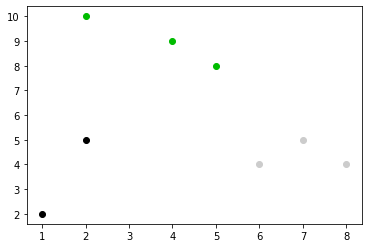

In [ ]:
dataset = np.array([[2,10],[2,5],[8,4],[5,8],[7,5],[6,4],[1,2],[4,9]])
clusters = NN_clustering(dataset,4)
print(clusters)
print("The resulting three clusters from nearest neighbor clustering is the same as the kmeans clusters\n")
print("""In terms of performance of Kmeans vs Nearest Neighbor, Kmeans is much better for bigger datasets,
 as we're actually able to train our model and get the trained centroids, and test our testing data with 
 those trained centriods, as opposed to nearest neighbor that doesn't do training, and just groups features
 based on nearest points, which is not very accurate""")

# Dataset 2

---



---



[[2, 10, 13, 142, 14, 18, 22, 156, 157, 92, 93, 158, 97, 102, 103, 106, 107, 45, 110, 111, 112, 113, 52, 117, 121, 123, 63], [0, 1, 3, 4, 5, 6, 7, 8, 9, 11, 12, 15, 16, 17, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 94, 95, 96, 98, 99, 100, 101, 104, 105, 108, 109, 114, 115, 116, 118, 119, 120, 122, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 159, 160, 161]]


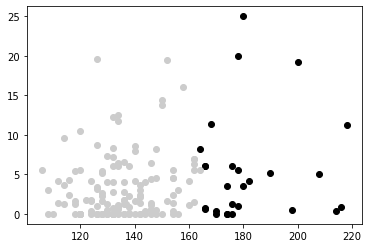

In [ ]:
# TRAINING THE ALGORITHM
x_cols = ['sbp','tobacco']
y_cols = ['chd']

x = pd.read_csv("https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv",usecols=x_cols)
y = pd.read_csv("https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv",usecols=y_cols)

trainingSet = x.head(300)
testingSet = x[300:462]
trainingSet = trainingSet.to_numpy()
testingSet = testingSet.to_numpy()
act_labels= y[300:462]
act_labels=act_labels.to_numpy()

clusters = NN_clustering(testingSet,33)
print(clusters)

# Accuracy

---



---



In [ ]:
nn_pred_labels = list(range(162))
# Assign first cluster indices (which is right black colored cluster) a chd of 1
for i in range(len(clusters[0])):
  nn_pred_labels[clusters[0][i]] = 1
# Assign second cluster indices (which is left gray colored cluster) a chd of 0

for i in range(len(clusters[1])):
  nn_pred_labels[clusters[1][i]] = 0

nn_pred_labels = np.array(nn_pred_labels)
nn_pred_labels = nn_pred_labels.reshape(162,1)
print(act_labels.shape)



# True Positive (TP): we predict a label of 1 (positive), and the true label is 1.
TP = np.sum(np.logical_and(nn_pred_labels == 1, act_labels == 1))
 
# True Negative (TN): we predict a label of 0 (negative), and the true label is 0.
TN = np.sum(np.logical_and(nn_pred_labels == 0, act_labels == 0))
 
# False Positive (FP): we predict a label of 1 (positive), but the true label is 0.
FP = np.sum(np.logical_and(nn_pred_labels == 1, act_labels == 0))
 
# False Negative (FN): we predict a label of 0 (negative), but the true label is 1.
FN = np.sum(np.logical_and(nn_pred_labels == 0, act_labels == 1))
 
print ('TP: %i, FP: %i, TN: %i, FN: %i' % (TP,FP,TN,FN))

accuracy = (TP + TN)/(TP+TN+FP+FN)
print(TP+TN)
print(TP+TN+FP+FN)
print(accuracy)

(162, 1)
TP: 14, FP: 13, TN: 99, FN: 36
113
162
0.6975308641975309


# PART C

---



---



#DB SCAN Function

---



---



In [ ]:
def nearest_neighbor(point, points, epsilon):
    min_distance = epsilon
    nearest_index = -1
    for i, p in enumerate(points):
        if not np.array_equal(p, point):
            distance = euclidean_distance(point, p)
            if distance < min_distance:
                nearest_index = i
    return nearest_index

def dbscan(points, epsilon,minPoints):
    points = np.array(points)
    n = len(points)
    clusters = [set([i]) for i in range(n)]
    noise = []
    for i, p in enumerate(points):
        nearest_index = nearest_neighbor(p, points, epsilon)

        if nearest_index != -1:
            if euclidean_distance(p, points[nearest_index]) < epsilon:
                cluster1 = next((cluster for cluster in clusters if i in cluster))
                cluster2 = next((cluster for cluster in clusters if nearest_index in cluster))

                if cluster1 != cluster2:
                    clusters.remove(cluster2)
                    cluster1 |= cluster2
            else:
                clusters.append(set([i]))

    # Create a color map with a unique color for each cluster
    clusters = [list(cluster) for cluster in clusters]
    colors = plt.cm.nipy_spectral(np.linspace(0, 1, len(clusters)))

    # Plot each point with its corresponding color
    for i, cluster in enumerate(clusters):
      plt.scatter(points[cluster, 0], points[cluster, 1], color=colors[i])

    # remove the clusters of len less than the minPoint and assign them as noises.
    i = 0
    update_i = False
    while i < len(clusters):
      if(len(clusters[i]) < minPoints):
        for j in range(len(clusters[i])):
          noise.append(clusters[i])
        clusters.remove(clusters[i])
        update_i = False
      else:
        update_i = True
      if(update_i):  
        i+=1

    print("the final clusters: ",clusters)
    print("the final noises: ",noise)
    return clusters

#Dataset 1

---



---



the final clusters:  [[2, 4, 5], [3, 7]]
the final noises:  [[0], [1], [6]]
[[2, 4, 5], [3, 7]]


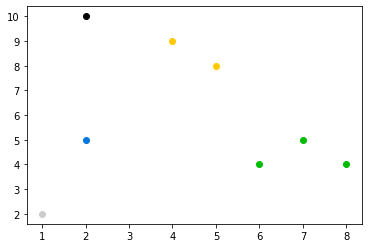

In [ ]:
dataset = np.array([[2,10],[2,5],[8,4],[5,8],[7,5],[6,4],[1,2],[4,9]])
labels = dbscan(dataset,2,2)
print(labels)

the final clusters:  [[1, 6], [0, 3, 7], [2, 4, 5]]
the final noises:  []
[[1, 6], [0, 3, 7], [2, 4, 5]]


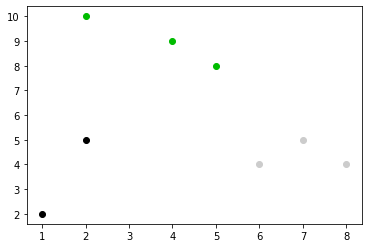

In [ ]:
import math
dataset = np.array([[2,10],[2,5],[8,4],[5,8],[7,5],[6,4],[1,2],[4,9]])
labels = dbscan(dataset,3.17,2)
print(labels)

# Dataset 2

---



---



the final clusters:  [[2, 10, 12, 13, 142, 14, 18, 22, 156, 158, 35, 42, 45, 49, 52, 63, 85, 89, 92, 93, 96, 102, 104, 106, 107, 110, 111, 112, 116, 117, 121, 123], [0, 1, 3, 4, 5, 6, 7, 8, 9, 11, 15, 16, 17, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37, 38, 39, 40, 41, 43, 44, 46, 47, 48, 50, 51, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 86, 87, 88, 90, 91, 94, 95, 98, 99, 100, 101, 105, 108, 109, 114, 115, 118, 119, 120, 122, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 159, 160, 161]]
the final noises:  [[113, 157, 97, 103], [113, 157, 97, 103], [113, 157, 97, 103], [113, 157, 97, 103]]
[[2, 10, 12, 13, 142, 14, 18, 22, 156, 158, 35, 42, 45, 49, 52, 63, 85, 89, 92, 93, 96, 102, 104, 106, 107, 110, 111, 112, 116, 117, 121, 123], [0, 1, 3, 4, 5, 6, 7, 8, 9, 11, 15, 16, 17, 1

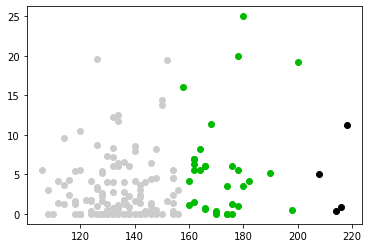

In [ ]:
# TRAINING THE ALGORITHM
x_cols = ['sbp','tobacco']
y_cols = ['chd']

x = pd.read_csv("https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv",usecols=x_cols)
y = pd.read_csv("https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv",usecols=y_cols)

trainingSet = x.head(300)
testingSet = x[300:462]
trainingSet = trainingSet.to_numpy()
testingSet = testingSet.to_numpy()
act_labels= y[300:462]
act_labels=act_labels.to_numpy()

DBClusters = dbscan(testingSet,25,5)
print(DBClusters)

# Accuracy

---



---



In [ ]:
DB_pred_labels = list(range(162))
# Assign first cluster indices (which is right black colored cluster) a chd of 1
for i in range(len(DBClusters[0])):
  DB_pred_labels[DBClusters[0][i]] = 1
# Assign second cluster indices (which is left gray colored cluster) a chd of 0

for i in range(len(DBClusters[1])):
  DB_pred_labels[DBClusters[1][i]] = 0

DB_pred_labels = np.array(DB_pred_labels)
DB_pred_labels = DB_pred_labels.reshape(162,1)
print(act_labels.shape)



# True Positive (TP): we predict a label of 1 (positive), and the true label is 1.
TP = np.sum(np.logical_and(DB_pred_labels == 1, act_labels == 1))
 
# True Negative (TN): we predict a label of 0 (negative), and the true label is 0.
TN = np.sum(np.logical_and(DB_pred_labels == 0, act_labels == 0))
 
# False Positive (FP): we predict a label of 1 (positive), but the true label is 0.
FP = np.sum(np.logical_and(DB_pred_labels == 1, act_labels == 0))
 
# False Negative (FN): we predict a label of 0 (negative), but the true label is 1.
FN = np.sum(np.logical_and(DB_pred_labels == 0, act_labels == 1))
 
print ('TP: %i, FP: %i, TN: %i, FN: %i' % (TP,FP,TN,FN))

accuracy = (TP + TN)/(TP+TN+FP+FN)
print(TP+TN)
print(TP+TN+FP+FN)
print(accuracy)

(162, 1)
TP: 15, FP: 17, TN: 94, FN: 32
109
158
0.689873417721519


# Performance Comparison of k-means, NN clustering, and DBScan
Dataset 1

---

For dataset 1, k-means and nearest neighbor with a threshold of 4 had the exact same clusters at the end, DBScan with an epsilon of 4 and minPoints of 2 would also have the exact same clusters as the other two, but we used different values for that.

---
Dataset 2


---

Kmeans had a 67.9% accuracy, NN clustering had a 69.75% accuracy, and DBScan had 68.99% accuracy. These accuracies were acquired by comparing the predicted labels resulting from testing our test set to our actual labels of the same samples. 
Looking at these accuracies we can conclude that K-means, Nearest Neighbor Clustering, and DBScan have similar performances when it comes to bigger data sets.




#PART D

---



---



# K MEANS

---



---



In [ ]:
from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(trainingSet)
kmeans.labels_

kmeans.predict(testingSet)

print("Sklearn's final cluster centers: ",kmeans.cluster_centers_)
print("My final cluster centers:  [162.41891892   5.27621622][127.09292035   3.12769912]")

Sklearn's final cluster centers:  [[126.55251142   3.16351598]
 [160.82716049   4.9937037 ]]
My final cluster centers:  [162.41891892   5.27621622][127.09292035   3.12769912]


# Nearest Neighbor

---



---



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

x_cols = ['sbp','tobacco']
y_cols = ['chd']

x = pd.read_csv("https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv",usecols=x_cols)
y = pd.read_csv("https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv",usecols=y_cols)

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=162)

scaler = StandardScaler()
scaler.fit(xTrain)

xTrain = scaler.transform(xTrain)
xTest = scaler.transform(xTest)

classifier = KNeighborsClassifier(n_neighbors=32)
classifier.fit(xTrain, yTrain)
y_pred = classifier.predict(xTest)

accuracy = accuracy_score(yTest, y_pred)
print(classifier.n_features_in_)

print("Accuracy:", accuracy)
y_pred = y_pred.reshape(162)
nn_pred_labels = nn_pred_labels.reshape(162)
print(classification_report(yTest, y_pred))
print("sklearn's predicted labels",y_pred)
print("My predicted labels",nn_pred_labels)
print

# Same classification
sameClass = np.sum(np.logical_and(nn_pred_labels == 1, y_pred == 1))
 
# Different Classification
diffClass = np.sum(np.logical_and(nn_pred_labels == 0, y_pred == 0)) 


accuracy = (sameClass + diffClass)/(len(nn_pred_labels))
print("the accuracy compared to sklearn's predicted labels: ",accuracy)

2
Accuracy: 0.7160493827160493
              precision    recall  f1-score   support

           0       0.71      0.95      0.81       104
           1       0.77      0.29      0.42        58

    accuracy                           0.72       162
   macro avg       0.74      0.62      0.62       162
weighted avg       0.73      0.72      0.67       162

sklearn's predicted labels [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 1 0 0 0 0 0 0 0 1 0 0]
My predicted labels [0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 1 1 0 0 1
 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


#DBScan

---



---



In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np
clustering = DBSCAN(eps=3, min_samples=2).fit(testingSet)
print("sklearn's predicted labels",clustering.labels_)
DB_pred_labels = DB_pred_labels.reshape(162)
print("my predicted labels are: ",DB_pred_labels)

sklearn's predicted labels [ 0  0  1  0  0  0  2  0  0  0 -1 -1  3  4 -1  0  0  0 -1  0  0  0  5  0
  0  0  0  0 -1  0  0  0  0 -1  0  5  0  0  0  0  0  0  5  0  0 -1  0  0
  0  5 -1  0  4  6  0  0  0  0  0  0  6  0  0  7  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0 -1  5  0  0  0  5  0  0  4  8  6  0
  5 -1 -1  0  0  0  8 -1  3  0 -1 -1  0  0 -1  7  5  9  0  0 -1  4  0  0
  0  4  2  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  5  0
  0  0  0  0  0  0  0  0  0  0  0  0  1  9  8  0  0  0]
my predicted labels are:  [  0   0   1   0   0   0   0   0   0   0   1   0   1   1   1   0   0   0
   1   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   1
   0   0   0   0   0   0   1   0   0   1   0   0   0   1   0   0   1   0
   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   1
   0   0   1   1   0   0   1  97   0   0   0   0   1 103   1   0   1   1
   0   0   1   

#Questions
Question 1: What are the different metrics used to evaluate the performance of different clustering algorithms?


---
Silhouette Score: Silhouette Score is the mean Silhouette Coefficient for all clusters, which is calculated using the mean intra-cluster distance and the mean nearest-cluster distance. This score is between -1 and 1, where the higher the score the more well-defined and distinct your clusters are.

Calinski-Harabaz Index: Calinski-Harabaz Index is calculated using the between-cluster dispersion and within-cluster dispersion in order to measure the distinctiveness between groups. Like the Silhouette Score, the higher the score the more well-defined the clusters are. This score has no bound, meaning that there is no ‘acceptable’ or ‘good’ value.

Davies-Bouldin Index: Davies-Bouldin Index is the average similarity of each cluster with its most similar cluster.The lower the score the better separation there is between your clusters.


---

---



Question 2: Instead of accuracy, what other ways can we evaluate the performance of three algorithms in lab 3?

---
We can use recall which is the true positive rate (TP/TP+FN), precision which shows the percentage of the correct positive predictions (TP/TP+FP), and F1 which combines recall and precision to one performance metric (2*(Recall**Precision/Recall + Precision)).
